## Imports

In [1]:
# Import modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np

# Figures inline and set visualization style
%matplotlib inline
sns.set()

## Importing Dataset


In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/rufusseopa/Team_18_JHB_WhatTheHack_regression-predict-api-template/master/Data/Train.csv', index_col = 0)

In [3]:
df.head()

,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,...,Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
Order No,,,,,,,,,,,,,,,,,,,,,
Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,9:40:10 AM,...,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,11:23:21 AM,...,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,12:42:44 PM,...,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,9:26:05 AM,...,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,9:56:18 AM,...,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21201 entries, Order_No_4211 to Order_No_9836
Data columns (total 28 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   User Id                                    21201 non-null  object 
 1   Vehicle Type                               21201 non-null  object 
 2   Platform Type                              21201 non-null  int64  
 3   Personal or Business                       21201 non-null  object 
 4   Placement - Day of Month                   21201 non-null  int64  
 5   Placement - Weekday (Mo = 1)               21201 non-null  int64  
 6   Placement - Time                           21201 non-null  object 
 7   Confirmation - Day of Month                21201 non-null  int64  
 8   Confirmation - Weekday (Mo = 1)            21201 non-null  int64  
 9   Confirmation - Time                        21201 non-null  object 
 10  Arrival

In [5]:
df.columns


Index(['User Id', 'Vehicle Type', 'Platform Type', 'Personal or Business',
       'Placement - Day of Month', 'Placement - Weekday (Mo = 1)',
       'Placement - Time', 'Confirmation - Day of Month',
       'Confirmation - Weekday (Mo = 1)', 'Confirmation - Time',
       'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Arrival at Pickup - Time',
       'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)', 'Pickup - Time',
       'Arrival at Destination - Day of Month',
       'Arrival at Destination - Weekday (Mo = 1)',
       'Arrival at Destination - Time', 'Distance (KM)', 'Temperature',
       'Precipitation in millimeters', 'Pickup Lat', 'Pickup Long',
       'Destination Lat', 'Destination Long', 'Rider Id',
       'Time from Pickup to Arrival'],
      dtype='object')

## Drop columns and fill-in missing values

In [7]:
df=df.drop(['User Id', 'Vehicle Type',
              'Placement - Day of Month',
              'Placement - Weekday (Mo = 1)',
              'Confirmation - Day of Month',
              'Confirmation - Weekday (Mo = 1)',
              'Arrival at Pickup - Day of Month',
              'Arrival at Pickup - Weekday (Mo = 1)',
              'Pickup - Day of Month',
              'Pickup - Weekday (Mo = 1)',
              'Arrival at Destination - Weekday (Mo = 1)',
              'Arrival at Destination - Day of Month',
              'Precipitation in millimeters',
              'Pickup Lat',
              'Pickup Long',
              'Destination Lat',
              'Destination Long','Rider Id'], axis=1)

In [8]:
df.head()

,Platform Type,Personal or Business,Placement - Time,Confirmation - Time,Arrival at Pickup - Time,Pickup - Time,Arrival at Destination - Time,Distance (KM),Temperature,Time from Pickup to Arrival
Order No,,,,,,,,,,
Order_No_4211,3,Business,9:35:46 AM,9:40:10 AM,10:04:47 AM,10:27:30 AM,10:39:55 AM,4,20.4,745
Order_No_25375,3,Personal,11:16:16 AM,11:23:21 AM,11:40:22 AM,11:44:09 AM,12:17:22 PM,16,26.4,1993
Order_No_1899,3,Business,12:39:25 PM,12:42:44 PM,12:49:34 PM,12:53:03 PM,1:00:38 PM,3,NaN,455
Order_No_9336,3,Business,9:25:34 AM,9:26:05 AM,9:37:56 AM,9:43:06 AM,10:05:27 AM,9,19.2,1341
Order_No_27883,1,Personal,9:55:18 AM,9:56:18 AM,10:03:53 AM,10:05:23 AM,10:25:37 AM,9,15.4,1214


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21201 entries, Order_No_4211 to Order_No_9836
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Platform Type                  21201 non-null  int64  
 1   Personal or Business           21201 non-null  object 
 2   Placement - Time               21201 non-null  object 
 3   Confirmation - Time            21201 non-null  object 
 4   Arrival at Pickup - Time       21201 non-null  object 
 5   Pickup - Time                  21201 non-null  object 
 6   Arrival at Destination - Time  21201 non-null  object 
 7   Distance (KM)                  21201 non-null  int64  
 8   Temperature                    16835 non-null  float64
 9   Time from Pickup to Arrival    21201 non-null  int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 1.8+ MB


**Change all time variables to seconds**

In [10]:
df['Placement - Time'] = pd.to_timedelta(df['Placement - Time'])
df['Confirmation - Time'] = pd.to_timedelta(df['Confirmation - Time'])
df['Arrival at Pickup - Time'] = pd.to_timedelta(df['Arrival at Pickup - Time'])
df['Pickup - Time'] = pd.to_timedelta(df['Pickup - Time'])
df['Arrival at Destination - Time'] = pd.to_timedelta(df['Arrival at Destination - Time'])

In [11]:
df['Placement - Time'] = df['Placement - Time'].dt.total_seconds()
df['Confirmation - Time'] = df['Confirmation - Time'].dt.total_seconds()
df['Arrival at Pickup - Time'] = df['Arrival at Pickup - Time'].dt.total_seconds()
df['Pickup - Time'] = df['Pickup - Time'].dt.total_seconds()
df['Arrival at Destination - Time'] = df['Arrival at Destination - Time'].dt.total_seconds()

In [12]:
df.head()

,Platform Type,Personal or Business,Placement - Time,Confirmation - Time,Arrival at Pickup - Time,Pickup - Time,Arrival at Destination - Time,Distance (KM),Temperature,Time from Pickup to Arrival
Order No,,,,,,,,,,
Order_No_4211,3,Business,34546.0,34810.0,36287.0,37650.0,38395.0,4,20.4,745
Order_No_25375,3,Personal,40576.0,41001.0,42022.0,42249.0,44242.0,16,26.4,1993
Order_No_1899,3,Business,45565.0,45764.0,46174.0,46383.0,3638.0,3,NaN,455
Order_No_9336,3,Business,33934.0,33965.0,34676.0,34986.0,36327.0,9,19.2,1341
Order_No_27883,1,Personal,35718.0,35778.0,36233.0,36323.0,37537.0,9,15.4,1214


**Plot the distribution of 'Temperature', 'Arrival at Destination - Time' and 'Time from Pickup to Arrival'** 

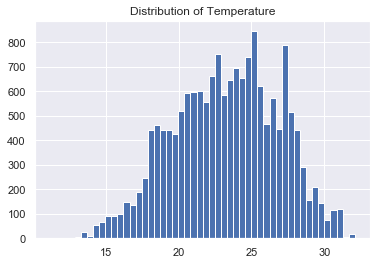

In [14]:
_ = plt.hist(df['Temperature'], bins='auto') 
plt.title('Distribution of Temperature')
plt.show()

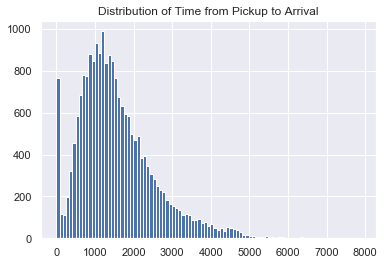

In [15]:
_ = plt.hist(df['Time from Pickup to Arrival'], bins='auto') 
plt.title('Distribution of Time from Pickup to Arrival')
plt.show()

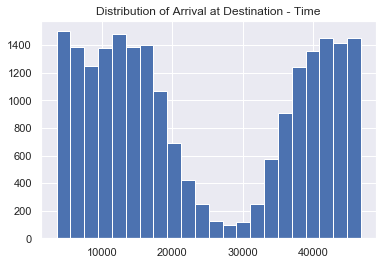

In [16]:
_ = plt.hist(df['Arrival at Destination - Time'], bins='auto') 
plt.title('Distribution of Arrival at Destination - Time')
plt.show()

**Impute Temperature with mean and Time from Pickup to Arrival with median**

In [17]:
df['Temperature'] = df.Temperature.fillna(df.Temperature.mean())

In [18]:
df['Arrival_at_Destination_Time'] = df['Arrival at Destination - Time']
df['Time_from_Pickup_to_Arrival'] = df['Time from Pickup to Arrival']

In [19]:
df.head()

,Platform Type,Personal or Business,Placement - Time,Confirmation - Time,Arrival at Pickup - Time,Pickup - Time,Arrival at Destination - Time,Distance (KM),Temperature,Time from Pickup to Arrival,Arrival_at_Destination_Time,Time_from_Pickup_to_Arrival
Order No,,,,,,,,,,,,
Order_No_4211,3,Business,34546.0,34810.0,36287.0,37650.0,38395.0,4,20.400000,745,38395.0,745
Order_No_25375,3,Personal,40576.0,41001.0,42022.0,42249.0,44242.0,16,26.400000,1993,44242.0,1993
Order_No_1899,3,Business,45565.0,45764.0,46174.0,46383.0,3638.0,3,23.258889,455,3638.0,455
Order_No_9336,3,Business,33934.0,33965.0,34676.0,34986.0,36327.0,9,19.200000,1341,36327.0,1341
Order_No_27883,1,Personal,35718.0,35778.0,36233.0,36323.0,37537.0,9,15.400000,1214,37537.0,1214


In [ ]:
#df['Time from Pickup to Arrival'] = df.'Time from Pickup to Arrival'.fillna(df.'Time from Pickup to Arrival'.mean())

In [20]:
df=df.drop(['Time from Pickup to Arrival', 'Arrival at Destination - Time'], axis=1)

In [21]:
df.head()

,Platform Type,Personal or Business,Placement - Time,Confirmation - Time,Arrival at Pickup - Time,Pickup - Time,Distance (KM),Temperature,Arrival_at_Destination_Time,Time_from_Pickup_to_Arrival
Order No,,,,,,,,,,
Order_No_4211,3,Business,34546.0,34810.0,36287.0,37650.0,4,20.400000,38395.0,745
Order_No_25375,3,Personal,40576.0,41001.0,42022.0,42249.0,16,26.400000,44242.0,1993
Order_No_1899,3,Business,45565.0,45764.0,46174.0,46383.0,3,23.258889,3638.0,455
Order_No_9336,3,Business,33934.0,33965.0,34676.0,34986.0,9,19.200000,36327.0,1341
Order_No_27883,1,Personal,35718.0,35778.0,36233.0,36323.0,9,15.400000,37537.0,1214


**Impute 'Arrival at Destination - Time' and 'Time_from_Pickup_to_Arrival' with median**

In [22]:
df['Arrival_at_Destination_Time'] = df.Arrival_at_Destination_Time.fillna(df.Arrival_at_Destination_Time.median())
df['Time_from_Pickup_to_Arrival'] = df.Time_from_Pickup_to_Arrival.fillna(df.Time_from_Pickup_to_Arrival.median())

In [23]:
df.head()

,Platform Type,Personal or Business,Placement - Time,Confirmation - Time,Arrival at Pickup - Time,Pickup - Time,Distance (KM),Temperature,Arrival_at_Destination_Time,Time_from_Pickup_to_Arrival
Order No,,,,,,,,,,
Order_No_4211,3,Business,34546.0,34810.0,36287.0,37650.0,4,20.400000,38395.0,745
Order_No_25375,3,Personal,40576.0,41001.0,42022.0,42249.0,16,26.400000,44242.0,1993
Order_No_1899,3,Business,45565.0,45764.0,46174.0,46383.0,3,23.258889,3638.0,455
Order_No_9336,3,Business,33934.0,33965.0,34676.0,34986.0,9,19.200000,36327.0,1341
Order_No_27883,1,Personal,35718.0,35778.0,36233.0,36323.0,9,15.400000,37537.0,1214


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21201 entries, Order_No_4211 to Order_No_9836
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Platform Type                21201 non-null  int64  
 1   Personal or Business         21201 non-null  object 
 2   Placement - Time             21201 non-null  float64
 3   Confirmation - Time          21201 non-null  float64
 4   Arrival at Pickup - Time     21201 non-null  float64
 5   Pickup - Time                21201 non-null  float64
 6   Distance (KM)                21201 non-null  int64  
 7   Temperature                  21201 non-null  float64
 8   Arrival_at_Destination_Time  21201 non-null  float64
 9   Time_from_Pickup_to_Arrival  21201 non-null  int64  
dtypes: float64(6), int64(3), object(1)
memory usage: 1.8+ MB


In [25]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Platform Type,21201.0,2.752182,0.625178,1.0,3.0,3.000000,3.0,4.0
Placement - Time,21201.0,26075.234800,14710.524863,3601.0,11167.0,31542.000000,39768.0,46799.0
Confirmation - Time,21201.0,25823.818971,14703.064869,3600.0,11227.0,30839.000000,39718.0,46798.0
Arrival at Pickup - Time,21201.0,25428.697561,14725.837143,3603.0,11227.0,25336.000000,39690.0,46798.0
Pickup - Time,21201.0,25068.483232,14729.363769,3600.0,11253.0,20752.000000,39744.0,46799.0
Distance (KM),21201.0,9.506533,5.668963,1.0,5.0,8.000000,13.0,49.0
Temperature,21201.0,23.258889,3.222006,11.2,21.4,23.258889,25.3,32.1
Arrival_at_Destination_Time,21201.0,24135.408424,14596.742398,3600.0,11151.0,18795.000000,39491.0,46799.0
Time_from_Pickup_to_Arrival,21201.0,1556.920947,987.270788,1.0,882.0,1369.000000,2040.0,7883.0


## Create Dummy variables for categorical columns

In [26]:
df_updated = pd.get_dummies(df)

In [27]:
# Ensure that column names have underscores instead of whitespaces
df_updated.columns = [col.replace(" ","_") for col in df_updated.columns]

In [28]:
df_updated.head()

,Platform_Type,Placement_-_Time,Confirmation_-_Time,Arrival_at_Pickup_-_Time,Pickup_-_Time,Distance_(KM),Temperature,Arrival_at_Destination_Time,Time_from_Pickup_to_Arrival,Personal_or_Business_Business,Personal_or_Business_Personal
Order No,,,,,,,,,,,
Order_No_4211,3,34546.0,34810.0,36287.0,37650.0,4,20.400000,38395.0,745,1,0
Order_No_25375,3,40576.0,41001.0,42022.0,42249.0,16,26.400000,44242.0,1993,0,1
Order_No_1899,3,45565.0,45764.0,46174.0,46383.0,3,23.258889,3638.0,455,1,0
Order_No_9336,3,33934.0,33965.0,34676.0,34986.0,9,19.200000,36327.0,1341,1,0
Order_No_27883,1,35718.0,35778.0,36233.0,36323.0,9,15.400000,37537.0,1214,0,1


In [29]:
# To avoid the dummy variable trap one of the Personal_or_Business_Business/_Peronal variables should be dropped
df_updated2 = df_updated.drop(['Personal_or_Business_Personal'], axis=1)

In [30]:
df_updated2.head()

,Platform_Type,Placement_-_Time,Confirmation_-_Time,Arrival_at_Pickup_-_Time,Pickup_-_Time,Distance_(KM),Temperature,Arrival_at_Destination_Time,Time_from_Pickup_to_Arrival,Personal_or_Business_Business
Order No,,,,,,,,,,
Order_No_4211,3,34546.0,34810.0,36287.0,37650.0,4,20.400000,38395.0,745,1
Order_No_25375,3,40576.0,41001.0,42022.0,42249.0,16,26.400000,44242.0,1993,0
Order_No_1899,3,45565.0,45764.0,46174.0,46383.0,3,23.258889,3638.0,455,1
Order_No_9336,3,33934.0,33965.0,34676.0,34986.0,9,19.200000,36327.0,1341,1
Order_No_27883,1,35718.0,35778.0,36233.0,36323.0,9,15.400000,37537.0,1214,0


In [31]:
df_updated2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21201 entries, Order_No_4211 to Order_No_9836
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Platform_Type                  21201 non-null  int64  
 1   Placement_-_Time               21201 non-null  float64
 2   Confirmation_-_Time            21201 non-null  float64
 3   Arrival_at_Pickup_-_Time       21201 non-null  float64
 4   Pickup_-_Time                  21201 non-null  float64
 5   Distance_(KM)                  21201 non-null  int64  
 6   Temperature                    21201 non-null  float64
 7   Arrival_at_Destination_Time    21201 non-null  float64
 8   Time_from_Pickup_to_Arrival    21201 non-null  int64  
 9   Personal_or_Business_Business  21201 non-null  uint8  
dtypes: float64(6), int64(3), uint8(1)
memory usage: 1.6+ MB


## Fitting the Multivariable Regression Model

In [32]:
# import regression module
from sklearn.linear_model import LinearRegression

# split predictors and response
X = df_updated2.drop(['Time_from_Pickup_to_Arrival'], axis=1)
y = df_updated2['Time_from_Pickup_to_Arrival']

In [33]:
# create model object
lm = LinearRegression()

In [34]:
# import train/test split module
from sklearn.model_selection import train_test_split

In [35]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)             

In [36]:
# train model
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Assessing Model Accuracy

In [37]:
#Predict y
y_pred = lm.predict(X_test)

In [38]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

#0.234718892286456/ 0.341011630536739

0.34101163053673944

In [39]:
from sklearn.metrics import mean_squared_error 
from math import sqrt

rmse = sqrt(mean_squared_error(y_test,y_pred))
print('Root Mean Square Error:', rmse)

#Root Mean Square Error: 755.3625090844657/798.6449952329383

Root Mean Square Error: 798.6449952329381
